# Breast Cancer Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Updating width of Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

In [2]:
## Reading the data file and taking checking first five entries.

breast_cancer_data = pd.read_csv('dataset.csv')
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


**Let's understand the data in terms of target variable:**

In breast cancer screening, the diagnosis is often coded using the letters "M" and "B" to indicate whether a breast lesion or tumor is malignant (cancerous) or benign (non-cancerous), respectively.

A pathologist will examine the tissue under a microscope and look for characteristic features of cancer cells, such as abnormal cell growth, irregular cell shape, and changes in the structure of the tissue. Based on these observations, the pathologist will determine whether the lesion is malignant or benign, and assign the appropriate code.

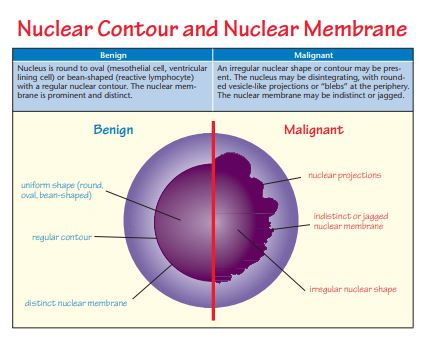

**Reference:** American Cancer Society. (2022). Breast cancer diagnosis. https://www.cancer.org/cancer/breast-cancer/understanding-a-breast-cancer-diagnosis.html

http://www.captodayonline.com/Archives/feature_stories/1006benignmalignantRED.pdf

In [3]:
breast_cancer_data.info()

## Outcome: 569 entries and there is no null values in any column. 
##Label field is identified of object type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [4]:
breast_cancer_data[breast_cancer_data.duplicated()]

## Outcome: No duplicate data found.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst


In [5]:
## limiting features of float type to have three decimal place
breast_cancer_data = breast_cancer_data.round(3)
breast_cancer_data.tail(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
567,911201,B,14.53,13.98,93.86,644.2,0.11,0.092,0.069,0.065,...,15.80,16.93,103.1,749.9,0.135,0.148,0.137,0.107,0.261,0.078
568,9012795,M,21.37,15.10,141.30,1386.0,0.10,0.152,0.193,0.126,...,22.69,21.84,152.1,1535.0,0.119,0.284,0.402,0.197,0.273,0.087


In [6]:
## lets drop the id column as it add no value to the data; it is just an identifier.
breast_cancer_data.drop(['id'], axis =1, inplace = True)

## Renaming diagnosis to label as it is our target variable.
breast_cancer_data.rename(columns={"diagnosis": "Target_Label"}, inplace = True)

## Running descriptive analysis on the data
breast_cancer_data.describe()

## Outcome: There is some skewness in the data, let's check is visually in below cell.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096388,0.104344,0.088819,0.048935,0.181188,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254279,0.272190,0.114610,0.290083,0.083953
std,3.524049,4.301036,24.298981,351.914129,0.014062,0.052816,0.079702,0.038798,0.027435,0.007076,...,4.833242,6.146258,33.602542,569.356993,0.022819,0.157333,0.208633,0.065726,0.061872,0.018073
min,6.981000,9.710000,43.790000,143.500000,0.053000,0.019000,0.000000,0.000000,0.106000,0.050000,...,7.930000,12.020000,50.410000,185.200000,0.071000,0.027000,0.000000,0.000000,0.156000,0.055000
25%,11.700000,16.170000,75.170000,420.300000,0.086000,0.065000,0.030000,0.020000,0.162000,0.058000,...,13.010000,21.080000,84.110000,515.300000,0.117000,0.147000,0.114000,0.065000,0.250000,0.071000
50%,13.370000,18.840000,86.240000,551.100000,0.096000,0.093000,0.062000,0.034000,0.179000,0.062000,...,14.970000,25.410000,97.660000,686.500000,0.131000,0.212000,0.227000,0.100000,0.282000,0.080000
75%,15.780000,21.800000,104.100000,782.700000,0.105000,0.130000,0.131000,0.074000,0.196000,0.066000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339000,0.383000,0.161000,0.318000,0.092000
max,28.110000,39.280000,188.500000,2501.000000,0.163000,0.345000,0.427000,0.201000,0.304000,0.097000,...,36.040000,49.540000,251.200000,4254.000000,0.223000,1.058000,1.252000,0.291000,0.664000,0.208000


**Outcome:** There is some skewness in the data, let's check is visually in below cell.

In [7]:
breast_cancer_data_numeric = breast_cancer_data.copy()

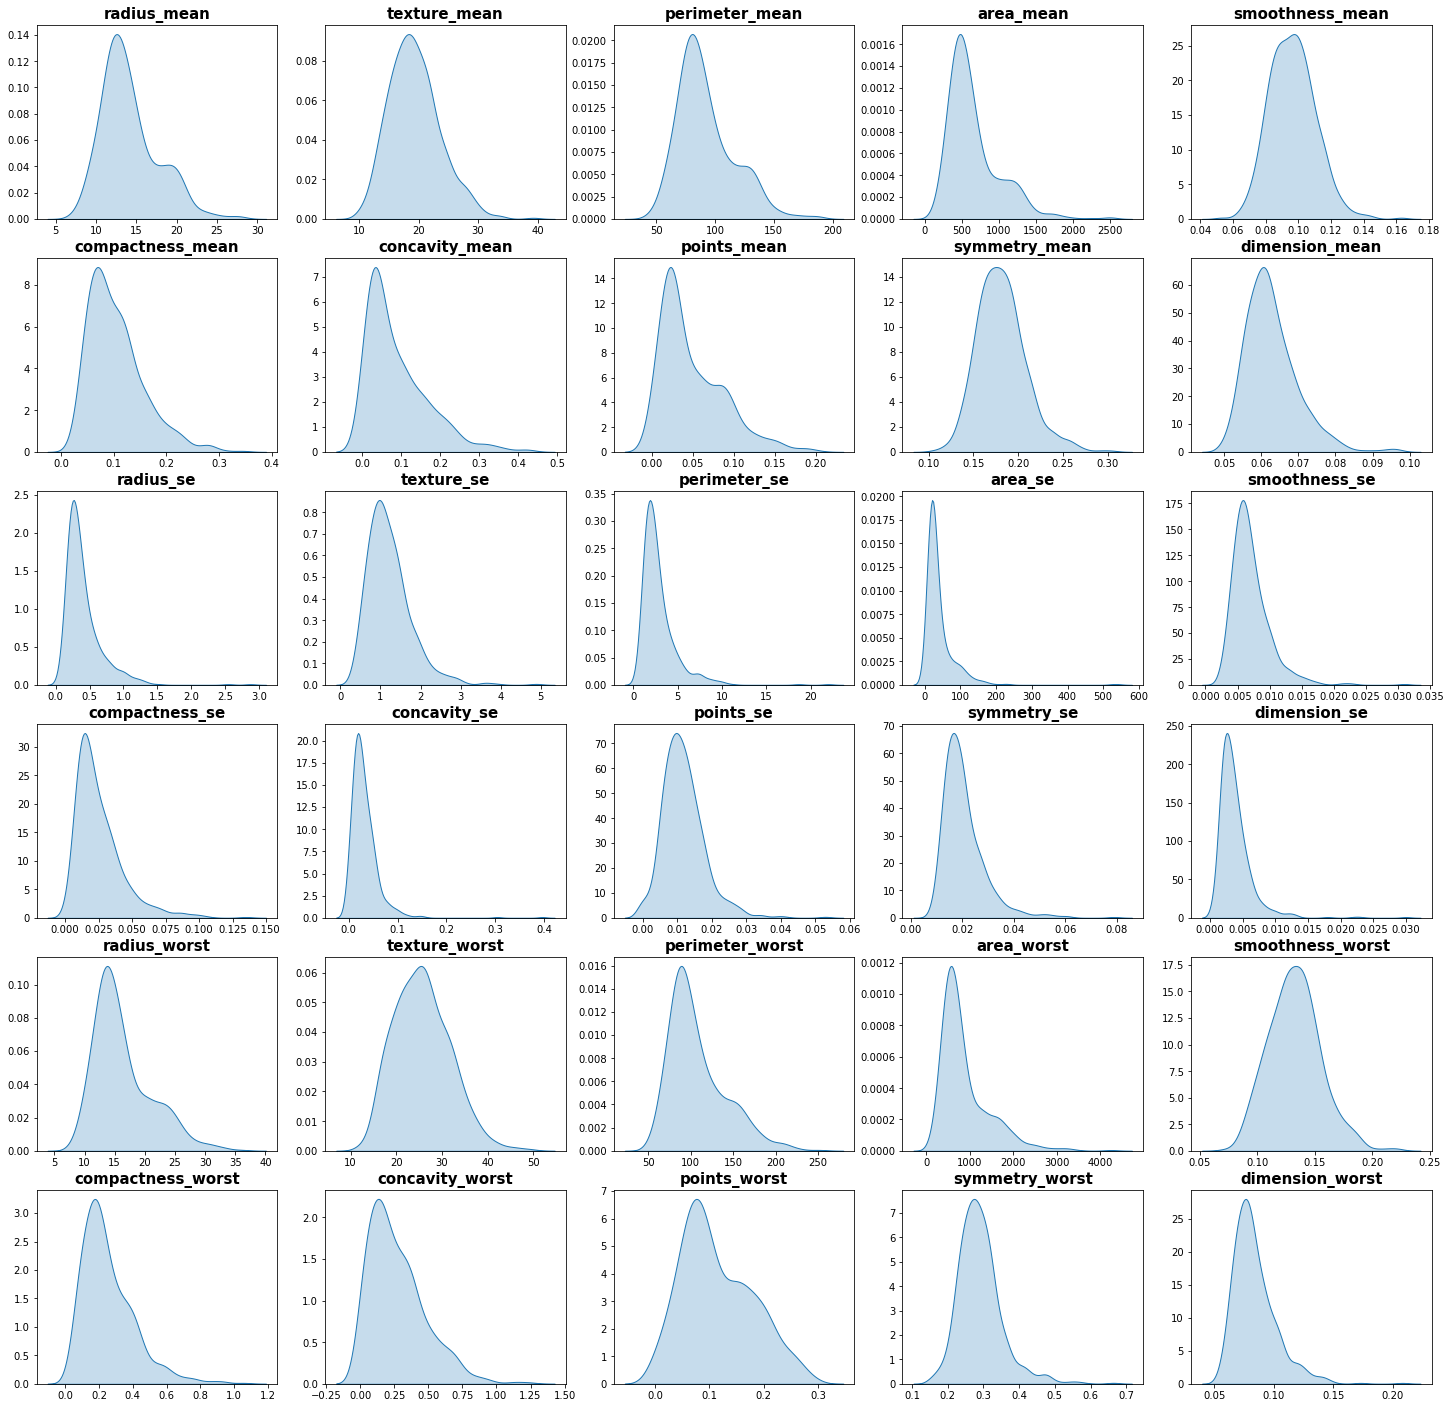

In [8]:
## Checking skewness in data visually.

fig, axes1 = plt.subplots(nrows=6, ncols=5, figsize=(25,25))

axes1 = axes1.flatten()

for i, column in enumerate(breast_cancer_data.iloc[ : , 1:].columns):
    axes1[i].set_title(column ,fontweight ="bold",fontsize=15)
    sns.kdeplot(ax=axes1[i], data=breast_cancer_data, x=column, fill = True) 
    axes1[i].set_ylabel("")  
    axes1[i].set_xlabel("")  


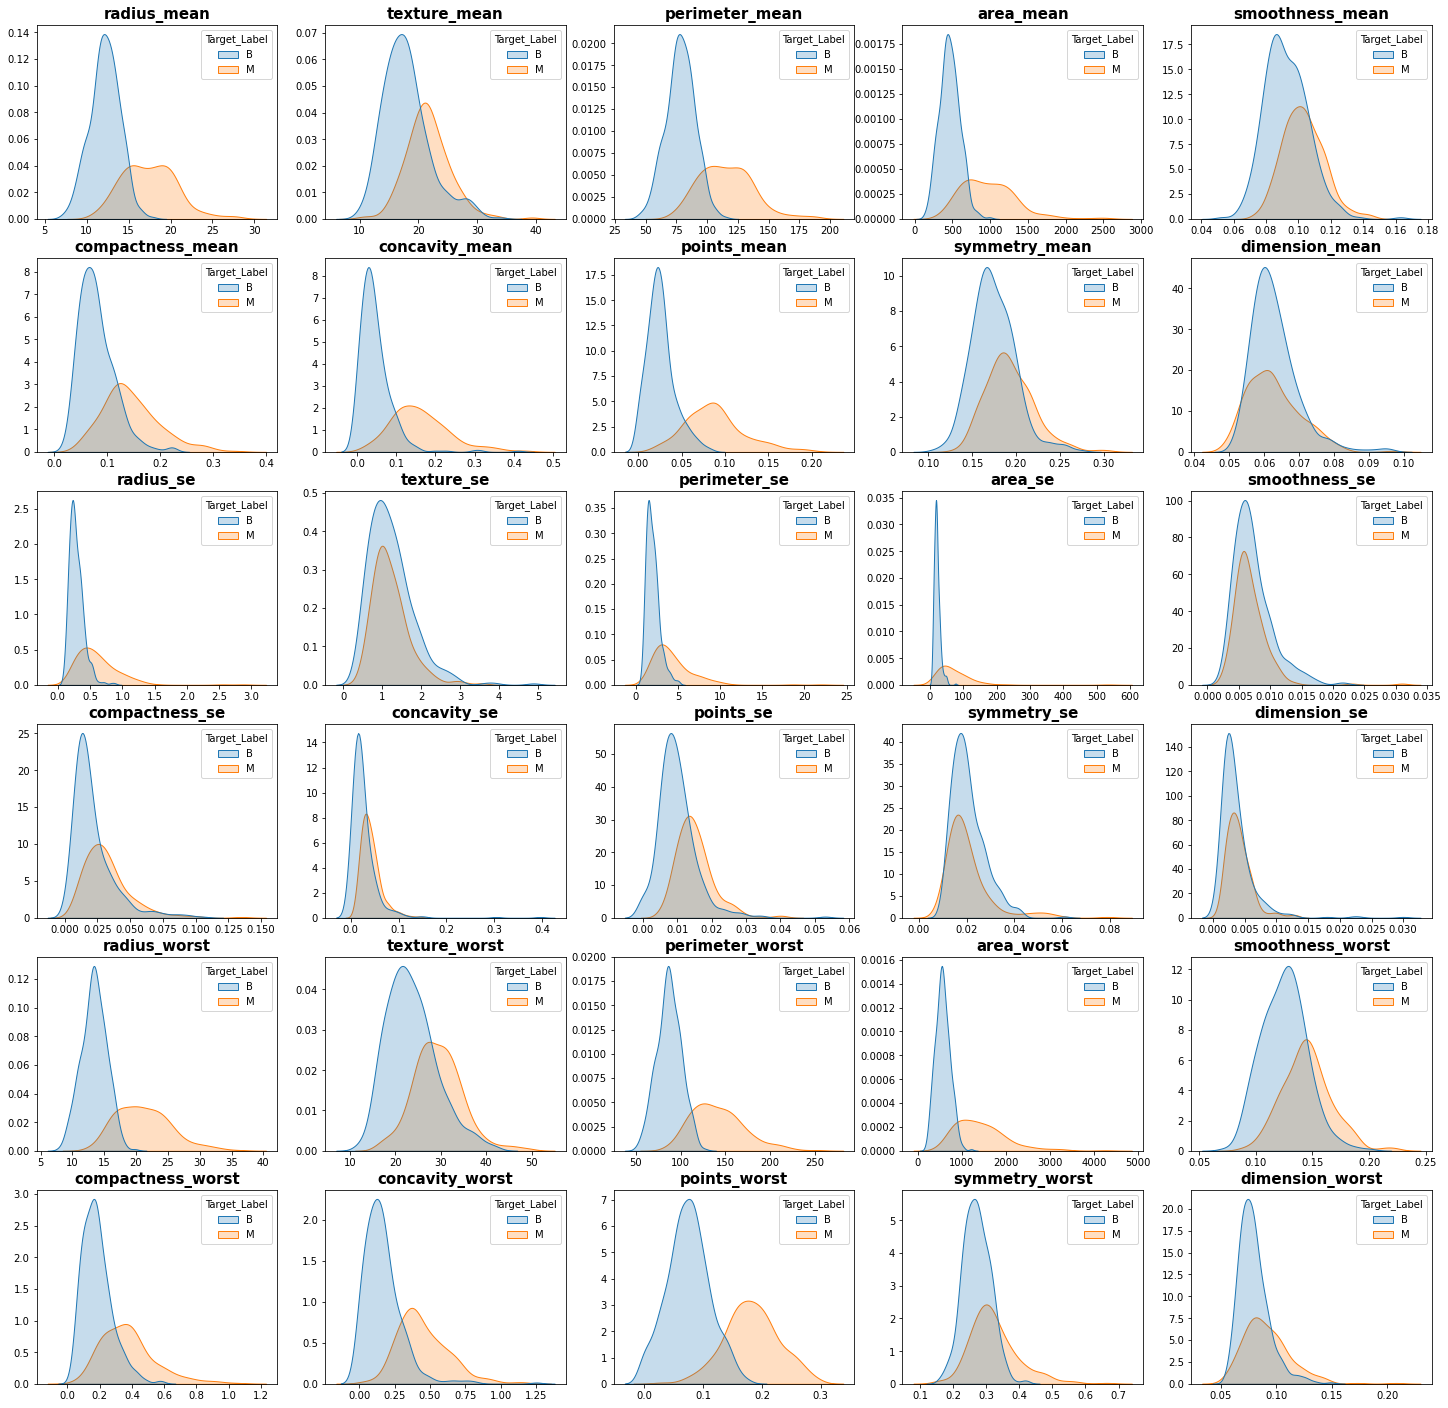

In [9]:
## Checking skewness in data visually w.r.t target variable.

fig, axes1 = plt.subplots(nrows=6, ncols=5, figsize=(25,25))

axes1 = axes1.flatten()

for i, column in enumerate(breast_cancer_data.iloc[ : , 1:].columns):
    axes1[i].set_title(column ,fontweight ="bold",fontsize=15)
    sns.kdeplot(ax=axes1[i], data=breast_cancer_data, x=column, fill = True, hue='Target_Label')  
    axes1[i].set_ylabel("")  
    axes1[i].set_xlabel("")  

## Outcome: It is clear that the cancerneous entries tends towards the right hand side of the graph, or I can say that 
##          "higher the values of these features, higher the chances of identifying cancerous tumor" (except for few features). 

**Outcome:** It is clear that the cancerneous entries tends towards the right hand side of the graph, or I can say that 

   **"higher the values of these features, higher the chances of identifying cancerous tumor" (except for few features).** 

In [10]:
## lets encode the target variable 
from sklearn.preprocessing import LabelEncoder

target_lab = breast_cancer_data_numeric['Target_Label']

# LabelEncoder object
le = LabelEncoder()
label_encoded = le.fit_transform(target_lab)

# Replace the original label variable with the encoded variable in the dataframe
breast_cancer_data_numeric['Target_Label_en'] = label_encoded

breast_cancer_data_numeric.head()


,Target_Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,Target_Label_en
0,B,12.32,12.39,78.85,464.1,0.103,0.070,0.040,0.037,0.196,...,15.64,86.97,549.1,0.138,0.127,0.124,0.094,0.283,0.068,0
1,B,10.60,18.95,69.28,346.4,0.097,0.115,0.064,0.026,0.192,...,22.94,78.28,424.8,0.121,0.252,0.192,0.079,0.294,0.076,0
2,B,11.04,16.83,70.92,373.2,0.108,0.078,0.030,0.025,0.171,...,26.44,79.93,471.4,0.137,0.148,0.107,0.074,0.300,0.079,0
3,B,11.28,13.39,73.00,384.8,0.116,0.114,0.046,0.048,0.177,...,15.77,76.53,434.0,0.137,0.182,0.087,0.086,0.210,0.068,0
4,B,15.19,13.21,97.65,711.8,0.080,0.069,0.034,0.027,0.172,...,15.73,104.50,819.1,0.113,0.174,0.136,0.082,0.249,0.068,0


In [11]:
breast_cancer_data_numeric.columns

Index(['Target_Label', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst',
       'Target_Label_en'],
      dtype='object')

**Let's understand the features:**
These features correspond to different measurements of the breast mass characteristics, as determined from the biopsy data. Specifically, they represent the mean, standard error, and "worst" (i.e., largest) values of various features computed for each cell nucleus present in the biopsy sample.

Some of these features are related to the size and shape of the cell nuclei (e.g., radius, perimeter, area), while others describe characteristics such as smoothness, compactness, and symmetry of the nuclei.

- **Smoothness**: This refers to the local variation in radius lengths among neighboring cells in the biopsy sample.
- **Compactness**: This feature measures the degree to which the cell nucleiare closely packed together.
- **Concavity**: This refers to the degree to which the contour of the cell nuclei in the biopsy sample is indented or has small bumps.
- **Points**: This feature measures the local concavity of the contour lines of the cell nuclei in the biopsy sample. 
- **Symmetry**: This refers to the degree of symmetry in the shape of the cell nuclei in the biopsy sample.
- **Dimension**: This feature measures the fractal dimension of the cell nuclei (complexity of a shape) in the biopsy sample.
- **Texture**: This refers to the variations in gray-level intensity of the pixels in the digital image of the biopsy sample. Cancer cells may have different patterns of texture than healthy cells, which can be used to distinguish between benign and malignant tumors.


**Outcome: What I understood from the data:**

- Radius, Perimeter and Area of the nuclei are our main parameters to determine abnormality across the cells.
- And we have the mean, standard error and worst (i.e., largest) mean value (of the local concavity of the contour lines of the cell nuclei in a biopsy sample) for these parameters.
- Remaining parameters are more about measuring cell structure in terms of smoothness, texture and compactness. 

**Malignant tumor cells are highly irregular, larger is dimensions, densely packed and darker color when views on digital biopsy report. And that's what our last graph seems to be highlighting.**

In [12]:
corr = breast_cancer_data_numeric.drop('Target_Label_en', axis=1).corrwith(breast_cancer_data_numeric['Target_Label_en'])
corr = corr.sort_values(ascending=False)
corr

## Lets visualize the same using heatmap.

points_worst         0.793476
perimeter_worst      0.782914
points_mean          0.776503
radius_worst         0.776454
perimeter_mean       0.742636
area_worst           0.733825
radius_mean          0.730029
area_mean            0.708984
concavity_mean       0.696447
concavity_worst      0.659605
compactness_mean     0.596660
compactness_worst    0.591016
radius_se            0.567201
perimeter_se         0.556141
area_se              0.548236
texture_worst        0.456903
smoothness_worst     0.420862
symmetry_worst       0.416224
texture_mean         0.415185
points_se            0.406344
smoothness_mean      0.358754
symmetry_mean        0.330876
dimension_worst      0.322902
compactness_se       0.292689
concavity_se         0.253421
dimension_se         0.071158
symmetry_se         -0.006371
texture_se          -0.008308
dimension_mean      -0.012418
smoothness_se       -0.066822
dtype: float64

<AxesSubplot:>

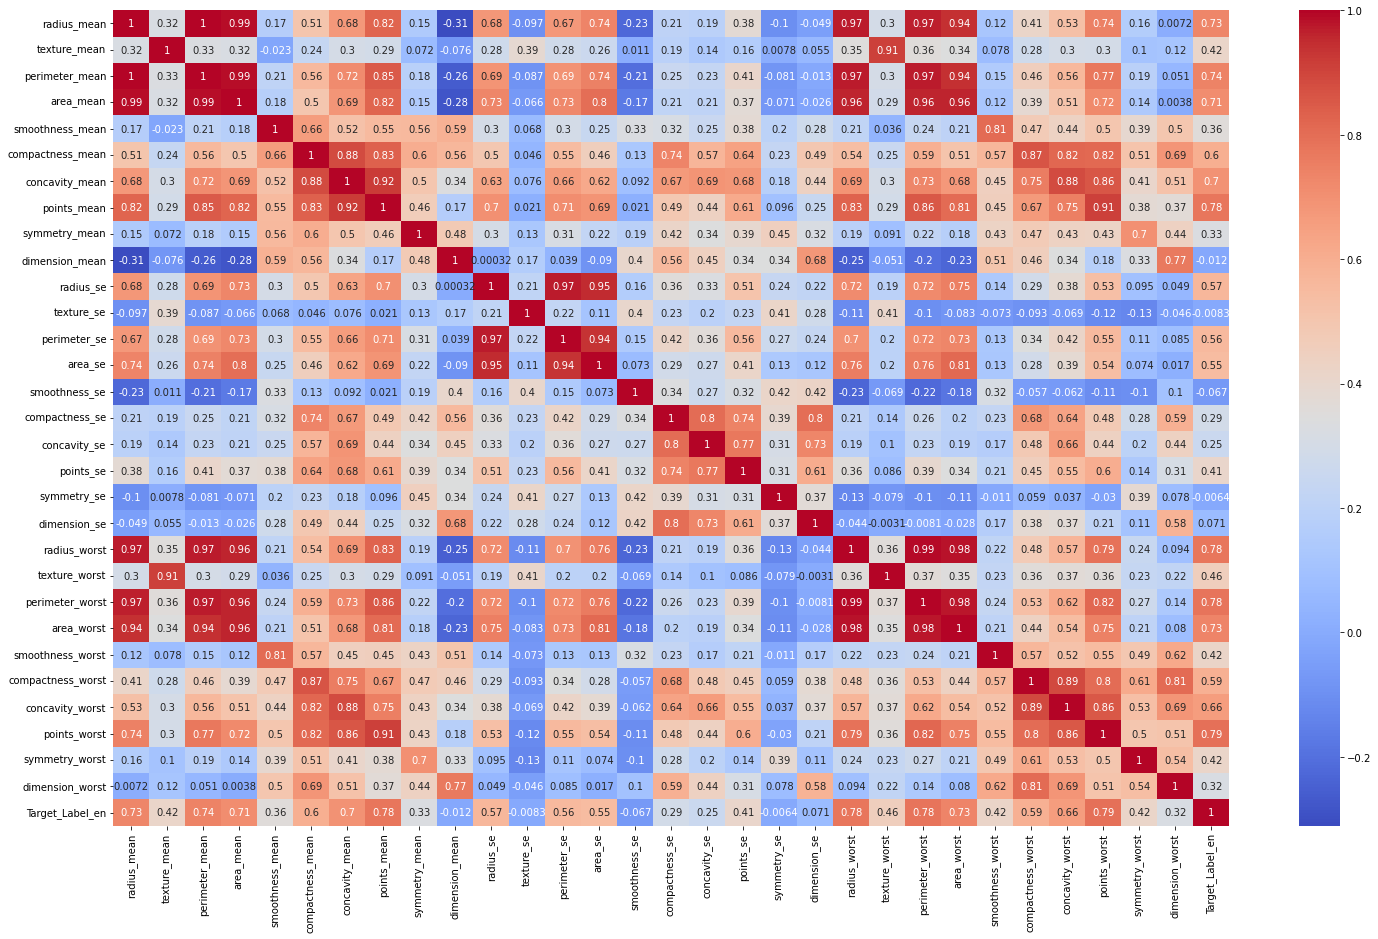

In [13]:
## lets check correlation between different fields of the dataset.
corr_matrix = breast_cancer_data_numeric.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


**Features are highly correlated to out Target field.**
- points_worst         
- perimeter_worst      
- points_mean          
- radius_worst         
- perimeter_mean       
- area_worst           
- radius_mean          
- area_mean          


<Figure size 1800x720 with 0 Axes>

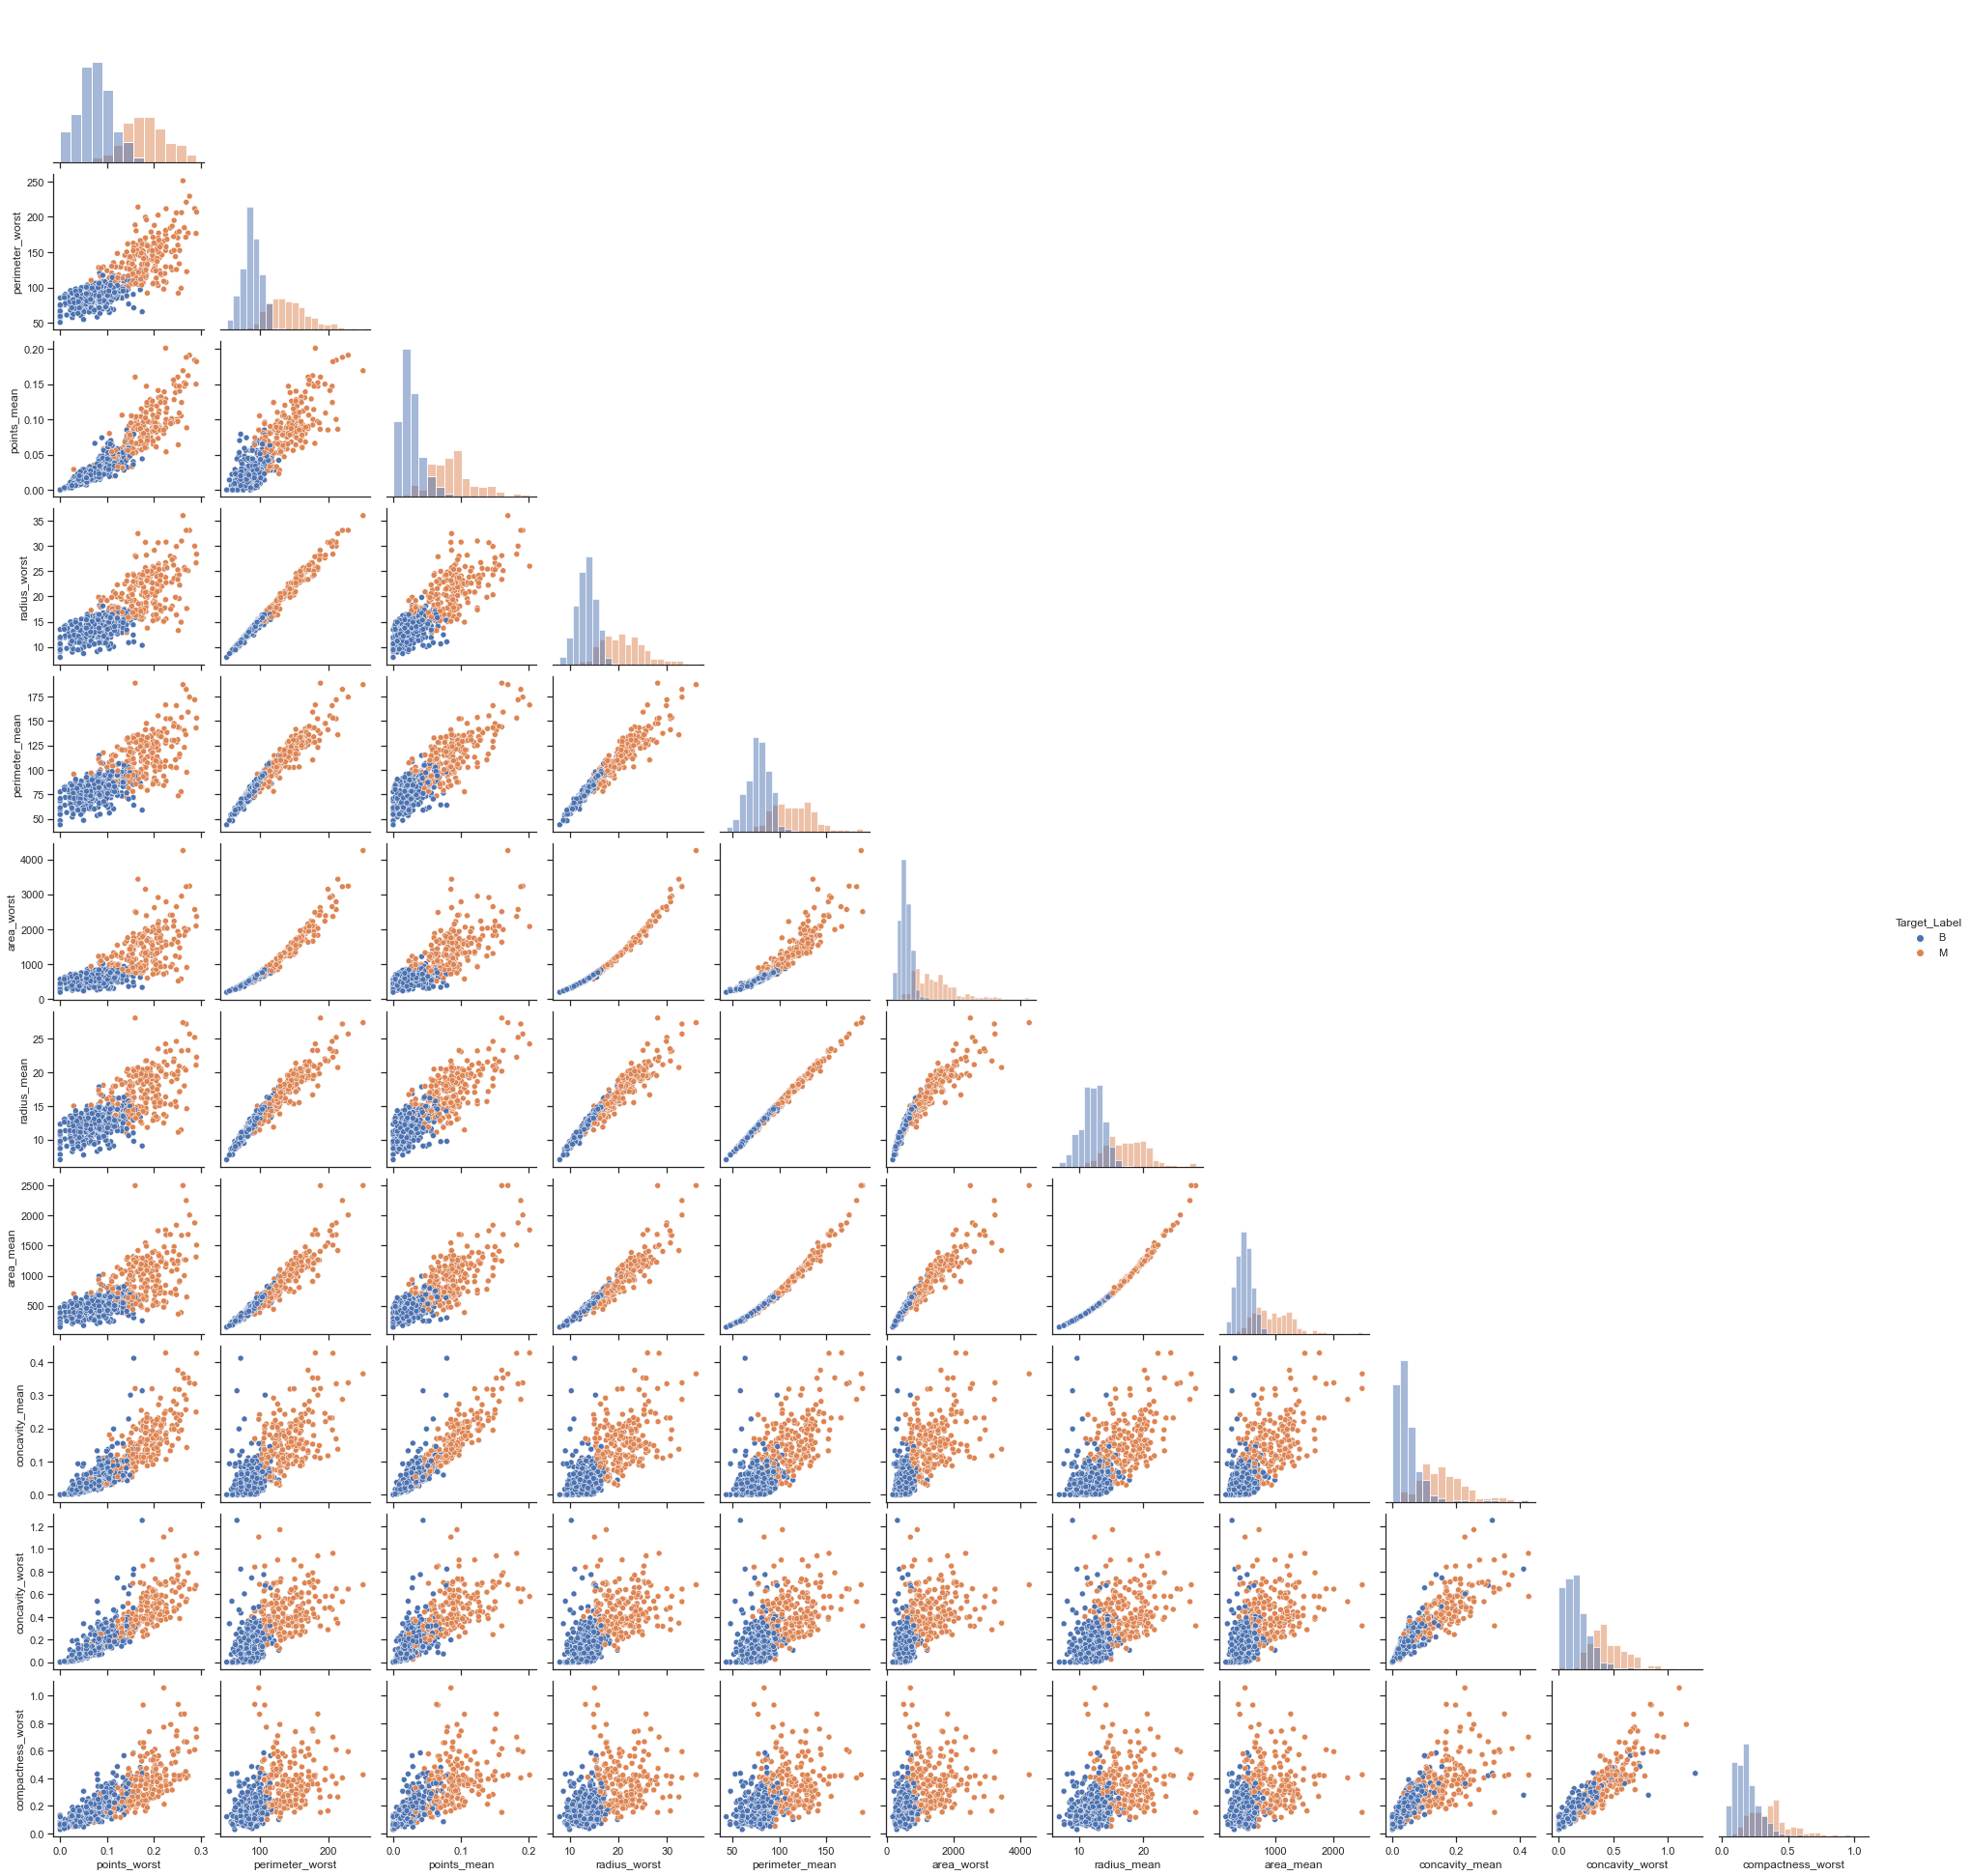

In [14]:
plt.figure(figsize=(25,10))
sns.set(style="ticks")

# scatter plot with hue="Target_Label" 
sns.pairplot(data=breast_cancer_data_numeric, 
             vars=['points_worst','perimeter_worst','points_mean','radius_worst','perimeter_mean'
                   ,'area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_worst'],
                   #'compactness_mean','radius_se','perimeter_se','area_se'], 
             hue="Target_Label",
             diag_kind="hist", 
             corner=True)


**Outcome - Evidence 1:**  malignant tumor cells has abnormal charateristics i.e abnormal cell size (perimeter, area, texture, radius).

<Figure size 1440x720 with 0 Axes>

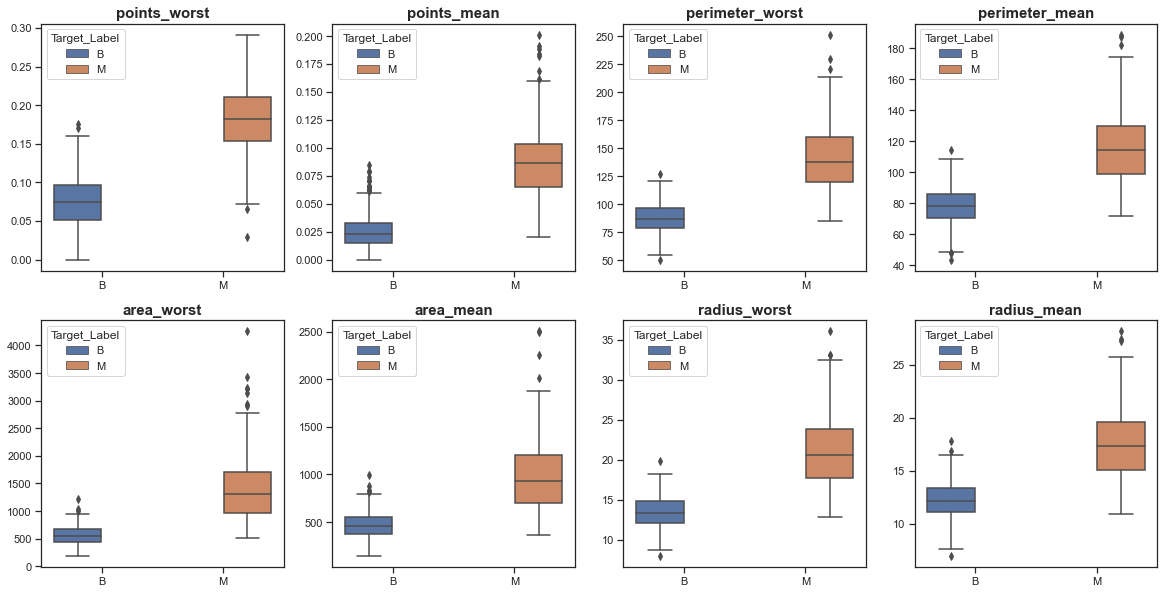

In [15]:
plt.figure(figsize=(20,10))
fig, axes2 = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

high_corr_features = ['points_worst', 'points_mean', 'perimeter_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'radius_worst', 'radius_mean']

for i, column in enumerate(high_corr_features):
    ax = axes2.flatten()[i] # get the flattened axes object
    ax.set_title(column ,fontweight="bold", fontsize=15)
    sns.boxplot(ax=ax, x='Target_Label' ,y=column, data=breast_cancer_data_numeric, hue='Target_Label')
    ax.set_xlabel("")  
    ax.set_ylabel("")


**Outcome - Evidence 2:**  malignant tumor cells has abnormal charateristics i.e abnormal cell size (perimeter, area, point, radius).

In [16]:
breast_cancer_data_numeric_cp = breast_cancer_data_numeric.copy()
breast_cancer_data_numeric_cp.shape

(569, 32)

In [17]:
## Outlier Analysis:
from scipy import stats

# numeric data
numeric_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
                'area_mean', 'smoothness_mean', 'compactness_mean',
                'concavity_mean', 'points_mean', 'symmetry_mean',
                'dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
                'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
                'points_se', 'symmetry_se', 'dimension_se', 'radius_worst',
                'texture_worst', 'perimeter_worst', 'area_worst',
                'smoothness_worst', 'compactness_worst', 'concavity_worst',
                'points_worst', 'symmetry_worst', 'dimension_worst']

# Calculating Z-scores for each column
z_scores = np.abs(stats.zscore(breast_cancer_data_numeric_cp[numeric_cols]))

threshold = 3

# Find indices of outliers in each column
outlier_indices = np.where(z_scores > threshold)


# Printing the number of outliers for each column
for col, count in zip(numeric_cols, np.bincount(outlier_indices[1])):
    print(f"{col}: {count} outliers")

# Removing outliers from the copy of the data.    
breast_cancer_data_numeric_cp = breast_cancer_data_numeric_cp[(z_scores < threshold).all(axis=1)]
breast_cancer_data_numeric_cp.shape

## Outcome: Removed 76 entries 

radius_mean: 5 outliers
texture_mean: 4 outliers
perimeter_mean: 7 outliers
area_mean: 8 outliers
smoothness_mean: 5 outliers
compactness_mean: 9 outliers
concavity_mean: 9 outliers
points_mean: 6 outliers
symmetry_mean: 5 outliers
dimension_mean: 6 outliers
radius_se: 7 outliers
texture_se: 9 outliers
perimeter_se: 8 outliers
area_se: 6 outliers
smoothness_se: 7 outliers
compactness_se: 12 outliers
concavity_se: 6 outliers
points_se: 6 outliers
symmetry_se: 10 outliers
dimension_se: 11 outliers
radius_worst: 6 outliers
texture_worst: 4 outliers
perimeter_worst: 6 outliers
area_worst: 10 outliers
smoothness_worst: 4 outliers
compactness_worst: 10 outliers
concavity_worst: 7 outliers
points_worst: 0 outliers
symmetry_worst: 9 outliers
dimension_worst: 9 outliers


(495, 32)

**Data shape changed after outlier removal:**  76 entries removed.

In [18]:
breast_cancer_data_numeric.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,Target_Label_en
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096388,0.104344,0.088819,0.048935,0.181188,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254279,0.272190,0.114610,0.290083,0.083953,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014062,0.052816,0.079702,0.038798,0.027435,0.007076,...,6.146258,33.602542,569.356993,0.022819,0.157333,0.208633,0.065726,0.061872,0.018073,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.053000,0.019000,0.000000,0.000000,0.106000,0.050000,...,12.020000,50.410000,185.200000,0.071000,0.027000,0.000000,0.000000,0.156000,0.055000,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086000,0.065000,0.030000,0.020000,0.162000,0.058000,...,21.080000,84.110000,515.300000,0.117000,0.147000,0.114000,0.065000,0.250000,0.071000,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.096000,0.093000,0.062000,0.034000,0.179000,0.062000,...,25.410000,97.660000,686.500000,0.131000,0.212000,0.227000,0.100000,0.282000,0.080000,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105000,0.130000,0.131000,0.074000,0.196000,0.066000,...,29.720000,125.400000,1084.000000,0.146000,0.339000,0.383000,0.161000,0.318000,0.092000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163000,0.345000,0.427000,0.201000,0.304000,0.097000,...,49.540000,251.200000,4254.000000,0.223000,1.058000,1.252000,0.291000,0.664000,0.208000,1.000000


In [19]:
breast_cancer_data_numeric_cp.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,Target_Label_en
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,13.868883,18.889778,89.931939,622.613333,0.095105,0.094745,0.074166,0.043327,0.177626,0.061778,...,25.152343,103.961111,820.704848,0.130834,0.231230,0.240895,0.106632,0.283792,0.081479,0.329293
std,3.042868,3.966250,20.795084,286.903247,0.012823,0.041091,0.061678,0.032558,0.023261,0.005576,...,5.666008,28.312550,452.870860,0.021055,0.125634,0.171016,0.058201,0.049682,0.014419,0.470432
min,6.981000,9.710000,43.790000,143.500000,0.063000,0.019000,0.000000,0.000000,0.117000,0.050000,...,12.020000,50.410000,185.200000,0.081000,0.034000,0.000000,0.000000,0.156000,0.055000,0.000000
25%,11.745000,16.000000,75.475000,424.800000,0.085000,0.062000,0.027500,0.019500,0.161000,0.057500,...,20.845000,84.440000,517.150000,0.116000,0.140000,0.106500,0.063000,0.249000,0.071000,0.000000
50%,13.210000,18.580000,85.630000,538.900000,0.095000,0.085000,0.053000,0.031000,0.177000,0.061000,...,25.110000,96.530000,670.000000,0.130000,0.203000,0.196000,0.092000,0.278000,0.079000,0.000000
75%,15.290000,21.460000,100.250000,718.050000,0.104000,0.120000,0.107000,0.063000,0.193000,0.065000,...,28.900000,117.700000,970.050000,0.144000,0.305500,0.349500,0.149000,0.311000,0.090000,1.000000
max,23.270000,30.720000,152.100000,1686.000000,0.137000,0.228000,0.317000,0.156000,0.254000,0.080000,...,41.610000,195.900000,2403.000000,0.191000,0.664000,0.849000,0.270000,0.475000,0.134000,1.000000


**Outcome of outlier analysis:**

- It is evident from the above descriptive analysis that **removing an outliers is affecting the statistical properties** for certain fields like: Perimeter and area of the tumor cell, thus it is better to keep them as is.

## Hypothesis Testing using Two-sample t-test

**Null hypothesis:** There is no significant difference in mean radius (or mean texture) between malignant and benign tumors.

**Alternative hypothesis:** There is a significant difference in mean radius (or mean texture) between malignant and benign tumors.

In [20]:
from scipy import stats

malignant = breast_cancer_data_numeric.loc[breast_cancer_data_numeric['Target_Label'] == 'M']
benign = breast_cancer_data_numeric.loc[breast_cancer_data_numeric['Target_Label'] == 'B']

# t-test for mean radius
t_statistic, p_value = stats.ttest_ind(malignant['radius_mean'], benign['radius_mean'])
print(f"Two-sample t-test for mean radius: t-statistic = {t_statistic}, p-value = {p_value}")

# t-test for mean texture
t_statistic, p_value = stats.ttest_ind(malignant['texture_mean'], benign['texture_mean'])
print(f"Two-sample t-test for mean texture: t-statistic = {t_statistic}, p-value = {p_value}")

if p_value < 0.05:
    print('Null Hypothesis Rejected. \n\t There is a significant difference in the mean radius (and mean texture) between malignant and benign tumors cells.')
else:
    print('Failed to reject Null Hypothesis. \n\t There is no significant difference in the mean radius (and mean texture) between malignant and benign tumors cells.')



Two-sample t-test for mean radius: t-statistic = 25.435821610057058, p-value = 8.465940572262422e-96
Two-sample t-test for mean texture: t-statistic = 10.86720108146434, p-value = 4.0586360478980736e-25
Null Hypothesis Rejected. 
	 There is a significant difference in the mean radius (and mean texture) between malignant and benign tumors cells.


**Statistically Proven:** There is a significant difference in the mean radius (and mean texture) between malignant and benign tumors cells.

## Feature Engineering

In [21]:
breast_cancer_data_numeric.sort_index(axis=1, inplace = True)
breast_cancer_data_numeric.columns


Index(['Target_Label', 'Target_Label_en', 'area_mean', 'area_se', 'area_worst',
       'compactness_mean', 'compactness_se', 'compactness_worst',
       'concavity_mean', 'concavity_se', 'concavity_worst', 'dimension_mean',
       'dimension_se', 'dimension_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'points_mean', 'points_se', 'points_worst',
       'radius_mean', 'radius_se', 'radius_worst', 'smoothness_mean',
       'smoothness_se', 'smoothness_worst', 'symmetry_mean', 'symmetry_se',
       'symmetry_worst', 'texture_mean', 'texture_se', 'texture_worst'],
      dtype='object')

In [22]:
# Defining weights for mean, stardard error and worst (max) values for feature engineering.
# As we know from the heatmap that mean and worst values has more impact on the cancer prediction, thus assigning higher weights to them.
weights = {'mean': 0.4, 'standard_err': 0.2, 'worst': 0.4}

# Converging mean, stardard error and worst (max) to one value for each characteristics fields.

cols = ['area', 'compactness', 'concavity', 'dimension', 'perimeter', 'points', 'radius', 'smoothness', 'symmetry', 'texture']

for col in cols:
    weighted_avg = lambda row: (row[col + '_mean']*weights['mean'] + row[col + '_se']*weights['standard_err'] + row[col + '_worst']*weights['worst']) / sum(weights.values())
    breast_cancer_data_numeric[col] = breast_cancer_data_numeric.apply(weighted_avg, axis=1)
    breast_cancer_data_numeric.drop([col+'_mean', col+'_se', col+'_worst'], axis=1, inplace=True)

breast_cancer_data_numeric

,Target_Label,Target_Label_en,area,compactness,concavity,dimension,perimeter,points,radius,smoothness,symmetry,texture
0,B,0,408.7660,0.0812,0.0690,0.0516,66.6620,0.0548,10.3752,0.0980,0.1954,11.3452
1,B,0,313.9000,0.1540,0.1092,0.0570,59.7100,0.0448,9.0820,0.0886,0.2014,16.9954
2,B,0,340.5480,0.0922,0.0570,0.0572,60.6084,0.0410,9.4194,0.0990,0.1918,17.5854
3,B,0,332.7860,0.1254,0.0576,0.0522,60.1822,0.0576,9.3476,0.1034,0.1580,11.9326
4,B,0,615.9040,0.1002,0.0712,0.0496,81.1276,0.0454,12.5916,0.0782,0.1716,11.6584
5,B,0,376.1400,0.1124,0.1332,0.0590,64.6932,0.0342,9.9132,0.0854,0.2066,18.6960
6,B,0,354.4740,0.1476,0.2010,0.0622,63.1072,0.0578,9.6438,0.0908,0.1430,25.0168
7,M,1,710.8640,0.2854,0.2546,0.0742,88.8058,0.1198,13.3170,0.1438,0.2712,26.6260
8,B,0,300.1860,0.0984,0.0498,0.0570,57.1124,0.0194,8.8830,0.0904,0.2074,17.3468
9,B,0,327.7200,0.1286,0.1192,0.0646,60.7710,0.0584,9.2240,0.0994,0.2078,14.1084


In [23]:
breast_cancer_data_numeric.drop(['Target_Label'], axis=1, inplace=True)

## Data Normalization

In [24]:
# Exclude the Target_Label_en column from the normalization process
columns_to_normalize = [col for col in breast_cancer_data_numeric.columns if col != 'Target_Label_en']

# Normalize the dataframe using Z-score normalization
normalized_breast_cancer_data = (breast_cancer_data_numeric[columns_to_normalize] - breast_cancer_data_numeric[columns_to_normalize].mean()) / breast_cancer_data_numeric[columns_to_normalize].std()

normalized_breast_cancer_data['Target_Label_en'] = breast_cancer_data_numeric['Target_Label_en']
normalized_breast_cancer_data.head()

,area,compactness,concavity,dimension,perimeter,points,radius,smoothness,symmetry,texture,Target_Label_en
0,-0.573290,-0.797052,-0.699869,-0.792563,-0.584244,-0.311160,-0.555329,0.356549,0.081481,-1.664947,0
1,-0.828035,0.064533,-0.355862,-0.248280,-0.882823,-0.550954,-0.940516,-0.301913,0.257343,-0.298586,0
2,-0.756477,-0.666867,-0.802558,-0.228122,-0.844238,-0.642076,-0.840019,0.426598,-0.024035,-0.155909,0
3,-0.777321,-0.273947,-0.797423,-0.732087,-0.862543,-0.244017,-0.861405,0.734814,-1.014722,-1.522899,0
4,-0.017058,-0.572188,-0.681043,-0.994149,0.037034,-0.536566,0.104837,-1.030423,-0.616102,-1.589207,0


## Applying cross validation and hyperparameter tuning

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Split the data into features (X) and target (y)
X = normalized_breast_cancer_data.drop(['Target_Label_en'], axis=1)
y = normalized_breast_cancer_data['Target_Label_en']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [26]:
# Function to perform cross validation and find optimal hyperparameters for each model
def find_best_params(model, params):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    return grid_search.best_params_

# reference: https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics; 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV


In [27]:
# hyperparameters for Decision Tree
print('\n**     Decision Tree       **')
dt_params = {'max_depth': [2, 4, 6, 8, 10, None]}
dt_best_params = find_best_params(DecisionTreeClassifier(random_state=51), dt_params)

# hyperparameters for Random Forest
print('\n**     Random Forest       **')
rf_params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [2, 4, 6, 8, 10, None]}
rf_best_params = find_best_params(RandomForestClassifier(random_state=51), rf_params)

# hyperparameters for SVM
print('\n**        SVM          **')
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_best_params = find_best_params(SVC(random_state=51), svm_params)

# hyperparameters for KNN
print('\n**        KNN          **')
knn_params = {'n_neighbors': [1, 3, 5, 7, 9]}
knn_best_params = find_best_params(KNeighborsClassifier(), knn_params)


# Reference: https://scikit-learn.org/stable/modules/grid_search.html
# https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/#5-fold-cross-validation


**     Decision Tree       **
Best parameters: {'max_depth': 6}
Best cross-validation score: 0.945054945054945

**     Random Forest       **
Best parameters: {'max_depth': 4, 'n_estimators': 100}
Best cross-validation score: 0.9604395604395606

**        SVM          **
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.9780219780219781

**        KNN          **
Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.964835164835165


In [28]:
# Train and evaluate Decision Tree model
dt = DecisionTreeClassifier(random_state=51, **dt_best_params)
dt_scores = cross_val_score(dt, X_train, y_train, cv=5)
print("\nDecision Tree cross-validation scores:", np.round(dt_scores, 3))
print("Decision Tree mean cross-validation score:", round(np.mean(dt_scores),3))
dt.fit(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)
print(f"Decision Tree test score: {dt_test_score:.3f}")

# Train and evaluate Random Forest model
rf = RandomForestClassifier(random_state=51, **rf_best_params)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("\nRandom Forest cross-validation scores:", np.round(rf_scores, 3))
print("Random Forest mean cross-validation score:", round(np.mean(rf_scores),3))
rf.fit(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(f"Random Forest test score: {rf_test_score:.3f}")

# Train and evaluate SVM model
svm = SVC(random_state=51, **svm_best_params)
svm_scores = cross_val_score(svm, X_train, y_train, cv=5)
print("\nSVM cross-validation scores:", np.round(svm_scores, 3))
print("SVM mean cross-validation score:", round(np.mean(svm_scores),3))
svm.fit(X_train, y_train)
svm_test_score = svm.score(X_test, y_test)
print(f"SVM test score: {svm_test_score:.3f}")

# Train and evaluate KNN model
knn = KNeighborsClassifier(**knn_best_params)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
print("\nKNN cross-validation scores:", np.round(knn_scores, 3))
print("KNN mean cross-validation score:", round(np.mean(knn_scores),3))
knn.fit(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)
print(f"KNN test score: {knn_test_score:.3f}")



Decision Tree cross-validation scores: [0.912 0.967 0.934 0.945 0.967]
Decision Tree mean cross-validation score: 0.945
Decision Tree test score: 0.912

Random Forest cross-validation scores: [0.956 0.956 0.945 0.956 0.989]
Random Forest mean cross-validation score: 0.96
Random Forest test score: 0.939

SVM cross-validation scores: [0.967 0.989 0.956 0.989 0.989]
SVM mean cross-validation score: 0.978
SVM test score: 0.965

KNN cross-validation scores: [0.967 0.989 0.934 0.989 0.945]
KNN mean cross-validation score: 0.965
KNN test score: 0.974


In [29]:
# Compare test scores of each model
test_scores = [dt_test_score, rf_test_score, svm_test_score, knn_test_score]
models = ['Decision Tree', 'Random Forest', 'SVM', 'KNN']

for i in range(len(models)):
    print(models[i], "test score:", test_scores[i])

best_model_index = np.argmax(test_scores)
print("Best model:", models[best_model_index])


Decision Tree test score: 0.9122807017543859
Random Forest test score: 0.9385964912280702
SVM test score: 0.9649122807017544
KNN test score: 0.9736842105263158
Best model: KNN


## KNN model evaluation on test set

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model with optimal hyperparameters on entire training set
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Evaluate KNN model on test set
knn_test_score = knn.score(X_test, y_test)
print("KNN test score:", round(knn_test_score*100,2))


KNN test score: 97.37
